<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
CS6501 - MACHINE LEARNING AND APPLICATIONS
#**Business Analytics - MSc**
ET5003 - MACHINE LEARNING APPLICATIONS 
##***Annual Repeat***
###Instructor: Enrique Naredo

###RepMLA_Etivity-3


In [ ]:
#@title Current Date
from datetime import date

Today = date.today() #@param {type:"date"}
print('Today is the %s'%(Today))

In [ ]:
#@markdown ---
#@markdown ### Enter your details here:
Student_ID = '0427845' #@param {type:"string"}
Student_full_name = 'Alison O''Connor' #@param {type:"string"}
#@markdown ---

In [ ]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = 'Final' #@param ["Draft", "Final"] {type:"raw"}
Submission = False #@param {type:"boolean"}

# Etivity-3

1. Fuzzy System

    Using el notebook RepMLA_3_1.ipynb as a baseline, solve the following task

    Antecedents: 
        Fuzzy triangular sets for 'service': unacceptable, poor, acceptable, good, amazing
        Fuzzy trapezoidal sets for 'quality': really_bad, bad, decent, great, really_great

    Consequents:
        Fuzzy Gaussian sets for 'tip': very_low, low, medium, high, very_high
        Design 5 rules using the antecedent and consequents
        Give 5 examples of usage, for instance, from the notebook; the service as 9.8, and the quality as 6.5 
        
        
2. Fuzzy Classification

    Using the notebook RepMLA_3_2.ipynb as a baseline, solve the following task 
    Consider all the features: ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']

    Perform a binary classification problem considering:
         'Iris-setosa' , 'Iris-versicolor' 
        'Iris-versicolor' , 'Iris-virginica'
         'Iris-setosa' , 'Iris-virginica'
    Perform a multi-classification problem considering:
        'Iris-setosa' , 'Iris-versicolor' , 'Iris-virginica'
        Fuzzy C-means clustering

3. Using el notebook RepMLA_3_3.ipynb as a baseline, solve the following task 
    Design 3 clustering problems using 500 data points and use the fuzzy partition coefficient (FPC) from 2 to 15 clusters.
    These are the problems
        Clustering problem 1 with 4 clusters
        Clustering problem 2 with 6 clusters
        Clustering problem 3 with 8 clusters

# 1. Fuzzy systems

## Introduction

Here we are going to look at Fuzzy systems using the tipping problem to illustrate fuzzy logic. Imagine you and a group of 10 friends are at a restaurant and want to leave a tip between 0-25%. This is obviously pre-covid because now we can't have more than five friends for dinner! You really enjoyed your meal and felt like both the service and food were good. Some of your friends felt like the food was only OK but service was good. Two people didn't get their meal for 15 min after everyone else they felt like service was bad but food was good. One friend had a massive argument with the server and didn't like the food or the service. Fuzzy systems offer us a way to be able to quantify the 'truthfullness' of an issue over a continuum, where the continuum can be, for example, the groups overall assessment of how 'good' or 'bad' service/food was based on each individuals experience. 
<br>
A fuzzy variable has a 'crisp' value, several descriptive terms and a membership function. The crisp value is a real number that describes how we think of the variable mathematically. The descriptive terms might be 'bad', 'good', 'excellent'. These terms together as a group are called the fuzzy set. The membership function defines how the crisp value is mapped to the fuzzy set on a scale of 0-1. In other words the membership function describes how 'good' or 'bad' something is. 
<br>
A fuzzy control system links the fuzzy variables using a set of rules. The rules control how each fuzzy variable relates to another fuzzy variable within the fuzzy set. The rules are generally arranged as 'if' 'then' statements of 'if' x is true then do Y. [Here](https://pythonhosted.org/scikit-fuzzy/userguide/fuzzy_control_primer.html) is a good breakdown of fuzzy systems. 



# Import modules

In [1]:
##Import relevant modules

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define the boundary of the problem

For our problem lets assume that everyone at dinner has been asked to rate both the service and the quality on a scale of 0-10. Our tip will be in the range of 0-25%. 

This defines the 'universe' or the boundary within which our fuzzy logic should be applied. 

In [2]:
##Universe variables

##service
service=ctrl.Antecedent(np.arange(0,11, 1), 'service')

##quality
quality=ctrl.Antecedent(np.arange(0,11, 1), 'quality')

##tip
tip=ctrl.Consequent(np.arange(0, 26, 1), 'tip')

We now introdcue our membership function generators. Let's choose three parameters 'bad', 'good', 'excellent' in the case of serivce and quality and, 'low', 'medium', 'high' in the case of our tip. 

In [19]:
#Here we set the membership function for the service
service['unacceptable'] = fuzz.trimf(service.universe, [0, 0, 3])
service['poor'] = fuzz.trimf(service.universe, [2, 5, 5])
service['acceptable'] = fuzz.trimf(service.universe, [3, 7, 7])
service['good'] = fuzz.trimf(service.universe, [5, 9, 9])
service['amazing'] = fuzz.trimf(service.universe, [7, 10, 10])

#Here we set the membership function for the quality
quality['really_bad'] = fuzz.trimf(quality.universe, [0, 0, 2])
quality['bad'] = fuzz.trimf(quality.universe, [1, 4, 5])
quality['decent'] = fuzz.trimf(quality.universe, [4, 6, 7])
quality['great'] = fuzz.trimf(quality.universe, [6, 8, 10])
quality['really_great'] = fuzz.trimf(quality.universe, [8, 10, 10])

#Here we set the membership function for the tip
tip['very_low'] = fuzz.trimf(tip.universe, [0, 0, 5])
tip['low'] = fuzz.trimf(tip.universe, [3, 4, 10])
tip['medium'] = fuzz.trimf(tip.universe, [8, 15, 15])
tip['high'] = fuzz.trimf(tip.universe, [15, 20, 20])
tip['very_high'] = fuzz.trimf(tip.universe, [20, 25, 25])

# Visualise the boundary
Now we will view the membership functions so we can see where the boundaries of each descriptive technique lies. 

C:\Users\alison\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\alison\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\alison\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


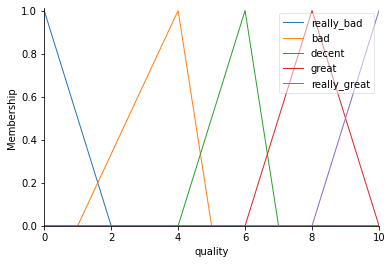

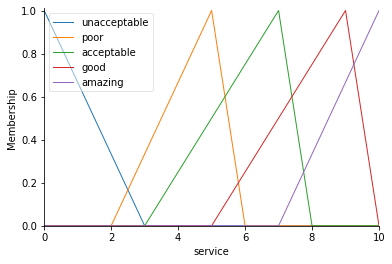

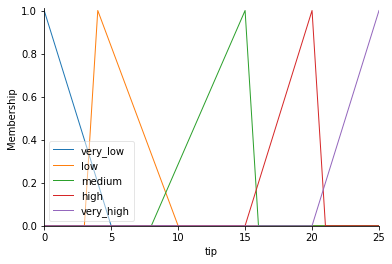

In [20]:
quality.view()
service.view()
tip.view()

# Set the rules

Now we define the rules that control how the boundary of the problem relates to the universe
<br>
1. If the quality is really bad or service is unacceptable then tip will be low
2. If the service is acceptable then the tip will be medium
3. If the quality is really great or service is amazing the tip will be high

In [21]:
rule1=ctrl.Rule(quality['really_bad'] | service['unacceptable'], tip['low'])
rule2=ctrl.Rule(service['acceptable'], tip['medium'])
rule3=ctrl.Rule(quality['really_great'] | service['amazing'], tip['high'])

Lets see what these rules look like

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

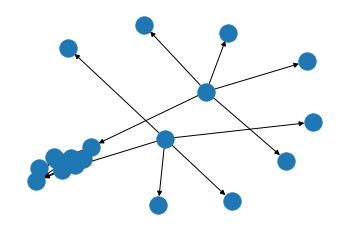

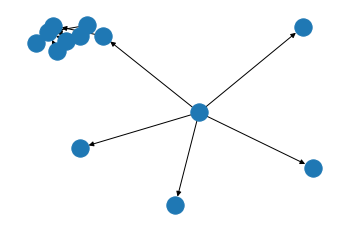

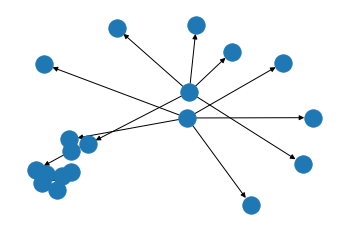

In [22]:
rule1.view()
rule2.view()
rule3.view()

# Defining the control system

Here we define the control system that applies the rules to our tipping problem

In [23]:
tipping_ctrl=ctrl.ControlSystem([rule1, rule2, rule3])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)

Lets gather each our ten dinner members scores on quality and service. The dictionary key is each indivdual while the dictionary value is a list of scores on 'quality' and 'service.

In [24]:
dic={'1':[5, 0],
    '2':[3, 0],
    '3':[7, 0],
    '4':[8, 5],
    '5':[2, 5],
    '6':[6, 8],
    '7':[7, 7],
    '8':[9, 9],
    '9':[4, 4],
    '10':[5, 6]}

For each member of the dinner party lets compute what they think is an appropriate tip according to the rules defined above

In [25]:
tip_dic={}
for k, v in dic.items():
    tipping.input['quality'] = v[0]
    tipping.input['service'] = v[1]
    
    ##COMPUTE THE TIP
    tipping.compute()
    ##ADD TO TIP DIC
    tip_dic[k]=tipping.output['tip']

Let's look at each individual's idea of an appropriate tip and calculate the average

The average tip based on each indiviudal assessment is 11.745714285714287


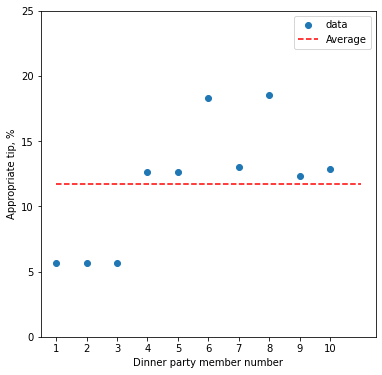

In [26]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(tip_dic.keys(), tip_dic.values(), label='data')

##calc avg
values=tip_dic.values()
av_tip=sum(values)/len(values)

print('The average tip based on each indiviudal assessment is %s'%(av_tip))

ax.hlines(xmin=0, xmax=10, y=av_tip, color='r', linestyle='--', label='Average')

ax.set_xlabel('Dinner party member number')
ax.set_ylabel('Appropriate tip, %')
ax.set_ylim([0, 25])
ax.legend()

# Summary

Here we have used the fuzzy system to assess the tip that should be provided based on quality of service and food for a number of individuals. The algorithm assesses each individual party member and then calculates the tip based on the average of the group. 

# 2. Fuzzy classification


Perform a binary classification problem considering:
 'Iris-setosa' , 'Iris-versicolor' 
'Iris-versicolor' , 'Iris-virginica'
 'Iris-setosa' , 'Iris-virginica'

## Dataset


### Guidelines
Use this cell as a guideline and remove it when submitting the Etivity

- Explain the dataset and its features.
- Give the link or information to get the dataset.
- Add comments about any preprocessing you used if any.
- Explain what technique was used to split the dataset into train and test sets.
- Show bar graphs and/or plots to graphically explain the dataset.

## Method

### Guidelines
Use this cell as a guideline and remove it when submitting the Etivity

- Explain the method used to solve the given problem.
- Use mathematical notation and images.
- Add any links to the references.

## Summary

### Guidelines
Use this cell as a guideline and remove it when submitting the Etivity

- This must be the final section in your notebook right before the references.
- Give a summary of the work you did.
- It is very important to use your own words to write this section.
- Use the structure to reference any section in your notebook.
- Add the discussion you had with your peers about any of the topics.
- Explain the pros and cons of the datasets, techniques, and methods used.
- List all your findings and give any conclusion related to your insights.
- Highlight in your work any hint, tip, issue or any useful comment to improve the work.

## References

### Guidelines
Use this cell as a guideline and remove it when submitting the Etivity

- Use the American Psychological Association (APA) citation style.
- References of books
- References of articles
- References of url (websites)